## trainig data is balanced
##  x_test is imbalanced

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [6]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.shape

(284807, 31)

In [10]:
# droping irelevant column : time 
data  = data.drop("Time",axis=1)

In [11]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
x = data.drop("Class",axis =1)
y = data["Class"]

In [13]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


## training and spliting

In [14]:
from sklearn.model_selection import train_test_split
strat =y
x_train,x_test1,y_train,y_test1 =train_test_split(x,y,test_size =0.2,random_state =42, stratify = strat)

In [15]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### balancing the data 


In [16]:
# as we see imbalnce in data so we use following to balance data#
#undersampling
#oversampling -> smote

# under sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state =42)
x_train_res,y_train_res = rs.fit_resample(x_train,y_train)

In [19]:
y_train_res.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

In [20]:
# now scaling to training set to Amount coulmn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_res["Amount"] =scaler.fit_transform(x_train_res[["Amount"]])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [22]:
model1 = LogisticRegression(random_state=42,max_iter=600)
model1.fit(x_train_res,y_train_res)

LogisticRegression(max_iter=600, random_state=42)

### Decision Tree 

In [23]:
model2  = DecisionTreeClassifier(random_state=42)
model2.fit(x_train_res,y_train_res)

DecisionTreeClassifier(random_state=42)

### Random Forest  Classifier 

In [24]:
model3  = RandomForestClassifier(random_state=42,class_weight='balanced' )
model3.fit(x_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
# cross validation over under sampling
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model1,x_train_res,y_train_res,cv=5,scoring="precision")
score2 = cross_val_score(model2,x_train_res,y_train_res,cv=5,scoring="precision")
score3 = cross_val_score(model3,x_train_res,y_train_res,cv=5,scoring="precision")



In [26]:
def model(obj,score):
    print("model name : ",obj)
    print("score",score)
    print("mean score",score.mean())
    print()

In [27]:
model("Logistic Regression",score1)
model("Decision Tree Classifier",score2)
model("Random Forest Classifer",score3)

model name :  Logistic Regression
score [0.97183099 0.98684211 0.97333333 0.93506494 0.97368421]
mean score 0.9681511140206469

model name :  Decision Tree Classifier
score [0.90243902 0.94936709 0.89156627 0.90909091 0.925     ]
mean score 0.9154926574297978

model name :  Random Forest Classifer
score [0.95774648 1.         0.98591549 0.98611111 0.97333333]
mean score 0.980621283255086



In [28]:
model_viz = pd.DataFrame({"model name" : ["Logistic Regression","Decision Tree Classifier","Random Forest Classifer"],
                         "precision":[0.9681511140206469,0.9154926574297978,0.980729510444063]})


model_viz



,model name,precision
0,Logistic Regression,0.968151
1,Decision Tree Classifier,0.915493
2,Random Forest Classifer,0.980730


<Axes: xlabel='model name', ylabel='precision'>

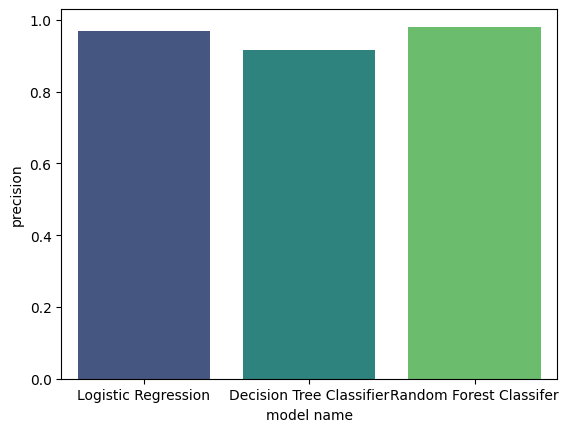

In [29]:
sns.barplot(model_viz,x="model name" ,y="precision",palette="viridis")

## over sampling

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_ovr,y_train_ovr = smote.fit_resample(x_train,y_train)

In [31]:
y_train_ovr.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [32]:
x_train_ovr["Amount"] = scaler.fit_transform(x_train_ovr[["Amount"]])

### Logistic regression -over  sampling

In [33]:
modelA = LogisticRegression(random_state=42,max_iter=600)
modelA.fit(x_train_ovr,y_train_ovr)

LogisticRegression(max_iter=600, random_state=42)

### Decision Tree Classifier

In [37]:
modelB = DecisionTreeClassifier(random_state=42)
modelB.fit(x_train_ovr,y_train_ovr)

DecisionTreeClassifier(random_state=42)

### Random Forest Classifier 

In [35]:
modelC = RandomForestClassifier(random_state=42)
modelC.fit(x_train_ovr,y_train_ovr)

RandomForestClassifier(random_state=42)

In [38]:
#cross validation over oversampling
scoreA = cross_val_score(modelA,x_train_ovr,y_train_ovr,cv = 5 , scoring = "precision")
scorB = cross_val_score(modelB,x_train_ovr,y_train_ovr,cv = 5 , scoring = "precision")
scoreC = cross_val_score(modelC,x_train_ovr,y_train_ovr,cv = 5 , scoring = "precision")

In [39]:
def model1(obj,score):
    print("model name : ",obj)
    print("score",score)
    print("mean score",score.mean())
    print()

In [40]:
model1("Logistic Regression",scoreA)
model1("Decision Tree Classifier",scorB)
model1("Random Forest Classifer",scoreC)

model name :  Logistic Regression
score [0.98210867 0.98159439 0.98140637 0.9814764  0.98201636]
mean score 0.9817204386538672

model name :  Decision Tree Classifier
score [0.99769408 0.99771684 0.99725667 0.9974763  0.99760671]
mean score 0.9975501203567856

model name :  Random Forest Classifer
score [0.99978022 0.99971431 0.99967035 0.99984614 0.99973628]
mean score 0.9997494602091557



In [42]:
model_viz1 = pd.DataFrame({"model name" : ["Logistic Regression","Decision Tree Classifier","Random Forest Classifer"],
                         "precision":[0.9817204386538672,0.9975501203567856,0.9997494602091557]})


model_viz1

,model name,precision
0,Logistic Regression,0.981720
1,Decision Tree Classifier,0.997550
2,Random Forest Classifer,0.999749


<Axes: xlabel='model name', ylabel='precision'>

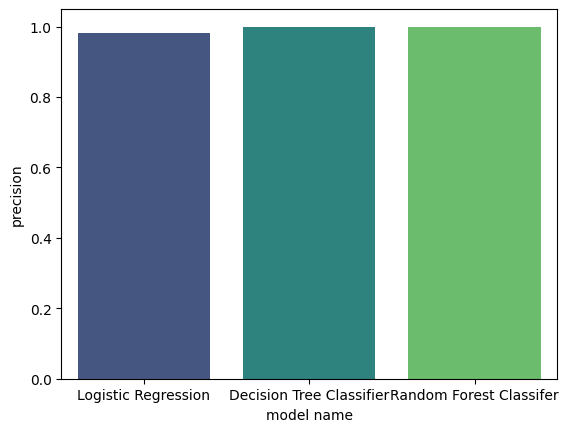

In [43]:
sns.barplot(model_viz1,x="model name" ,y="precision",palette="viridis")

## model for under sampling 

In [44]:
#model3 -> random forest classifer
from joblib import dump,load
dump(model3,"fraud detection.joblib")

['fraud detection.joblib']

In [45]:
x_test1["Amount"] = scaler.transform(x_test1[["Amount"]])

In [46]:
x_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.327534
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.371690
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.117364
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.414699
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.412679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,-0.850483,...,-0.207556,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,-0.276169
184616,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,-0.454388,...,0.340394,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,0.760067
274532,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,-1.734057,...,-0.222906,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,-0.353711
269819,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,0.910437,...,0.024393,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,-0.339612


In [47]:
final_pred=model3.predict(x_test1)


In [48]:
from sklearn import metrics
print(f"accuracy:{metrics.accuracy_score(y_test1,final_pred)}")
print(f"precision:{metrics.precision_score(y_test1,final_pred)}")
print(f"recall:{metrics.recall_score(y_test1,final_pred)}")
print(f"f1 score:{metrics.f1_score(y_test1,final_pred)}")

accuracy:0.969453319757031
precision:0.0489010989010989
recall:0.9081632653061225
f1 score:0.09280500521376434


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test1, final_pred))
print(classification_report(y_test1, final_pred))

[[55133  1731]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [51]:
final_pred

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
y_test1

263020    0
11378     0
147283    0
219439    0
36939     0
         ..
54199     0
184616    0
274532    0
269819    0
64170     0
Name: Class, Length: 56962, dtype: int64

In [53]:
len(y_test1)

56962

In [56]:

print("x_test",len(x_test1))
print("y_test",y_test1.value_counts())

x_test 56962
y_test Class
0    56864
1       98
Name: count, dtype: int64


## model for over sampling 

In [65]:
#modelC -> random forest classifer
from joblib import dump,load
dump(modelC,"fraudC detection.joblib")

['fraudC detection.joblib']

In [66]:
x_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.327534
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.371690
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.117364
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.414699
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.412679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,-0.850483,...,-0.207556,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,-0.276169
184616,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,-0.454388,...,0.340394,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,0.760067
274532,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,-1.734057,...,-0.222906,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,-0.353711
269819,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,0.910437,...,0.024393,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,-0.339612


In [67]:
final_pred1=modelC.predict(x_test1)


In [68]:
print(classification_report(y_test1, final_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [69]:
from sklearn import metrics
print(f"accuracy:{metrics.accuracy_score(y_test1,final_pred1)}")
print(f"precision:{metrics.precision_score(y_test1,final_pred1)}")
print(f"recall:{metrics.recall_score(y_test1,final_pred1)}")
print(f"f1 score:{metrics.f1_score(y_test1,final_pred1)}")

accuracy:0.9994733330992591
precision:0.8469387755102041
recall:0.8469387755102041
f1 score:0.8469387755102041


In [70]:
print((confusion_matrix(y_test1, final_pred1)))

[[56849    15]
 [   15    83]]


# here in over sampling we getting more precision and more accuracy 

In [83]:
model = load("fraudC detection.joblib")
#random input 
input_sample = np.array([[-0.674466 ,1.408105,-1.110622 ,-1.328366 ,1.388996 ,-1.308439 ,1.885879 	
                          ,-0.614233 ,0.311652 ,0.650757,0.394322,0.080084,0.810034,-0.224327,0.707899 ,-0.135837 ,0.045102,0.533837 ,0.291319,-0.327534,
                         0.627534,0.227534,0.297534,0.647534,0.527534,0.427534,0.324534,0.527534,-0.327534]])
predicted_value = model.predict(input_sample)

In [86]:
def enter(predicted_value):
    
    if predicted_value == 1:
        print("fraud")
    else:
        print("legitimate")

In [87]:
enter(predicted_value)

legitimate


In [96]:
#print(x_train_res.iloc[0])
input_sample1 = np.array([[1.114107,0.188459 ,0.149144,1.153868,0.224011,0.396246,0.020168, 0.217603,-0.141379, 0.090719,1.428138,0.920897,-0.732305,0.597721,-0.152293,
-0.748613,0.227005, -0.791045,-0.559968,-0.255692, 0.065655, 0.367010,-0.090954, -0.271464, 0.646597,-0.217493,0.035881,-0.004553,-0.494115]])
#y_train_res.iloc[0] - legitimate

#predicting using modelC
predicted_value1 = model.predict(input_sample)

In [98]:
print("value shoould be : legitimate")
enter(predicted_value1)


value shoould be : legitimate
legitimate


In [ ]:
# modelC = Random Forest Classifer i